In [1]:
import json
from fastai.vision import *
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def returnPoints(imagePath):
    #imageCoord = (os.path.join(imagePath, image_path))
    #imagePath0 = imagePath[23:-3]
    #imagePath1 = imagePath
    imageCoord = imagePath.parent/(imagePath.stem+'.json')
    #imageCoord = ('data/class_result/label/'+imagePath0+'json')
    #imgPlot = mpimg.imread('data/class_result/orig/'+image_path1+'pg')
    with open(imageCoord) as json_file:
        data1 = json.load(json_file)
    Point1 = ((data1['shapes'][0]['points'])[0])
    Point2 = ((data1['shapes'][1]['points'])[0])
    return tensor([ [Point1[1], Point1[0]], 
                    [Point2[1], Point2[0]] ])
path = Path('data/class_result/orig/image_with_mask5_0.jpg')
rP = returnPoints(path)
print(rP)

C:\Users\samsu\anaconda3\envs\Fat1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[384.6154,  90.8462],
        [371.5385, 783.1539]])


In [2]:
def get_ip(img,pts):
    print(pts)
    return ImagePoints(FlowField(img.size, pts), scale=True)

tensor([[384.6154,  90.8462],
        [371.5385, 783.1539]])


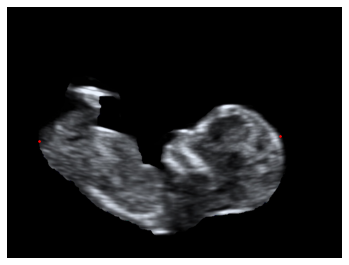

In [3]:
zz = Path('data/class_result/orig/image_with_mask5_0.jpg')
rP = returnPoints(zz)
img = open_image(zz)
img.show(y=get_ip(img, rP), figsize=(6,6))

#get_ip(img, rP)

In [4]:
path = Path('data/class_result/orig')
from fastai.vision import *
data2 = (PointsItemList.from_folder(path)
        .split_by_rand_pct(valid_pct=0.2, seed=42)
        .label_from_func(returnPoints)
        .transform(get_transforms(), tfm_y=True, size=(120,160), remove_out=False)
        .databunch().normalize(imagenet_stats)
       )

C:\Users\samsu\anaconda3\envs\Fat1\lib\site-packages\fastai\core.py:302: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(a, dtype=dtype, **kwargs)
C:\Users\samsu\anaconda3\envs\Fat1\lib\site-packages\fastai\vision\transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should 

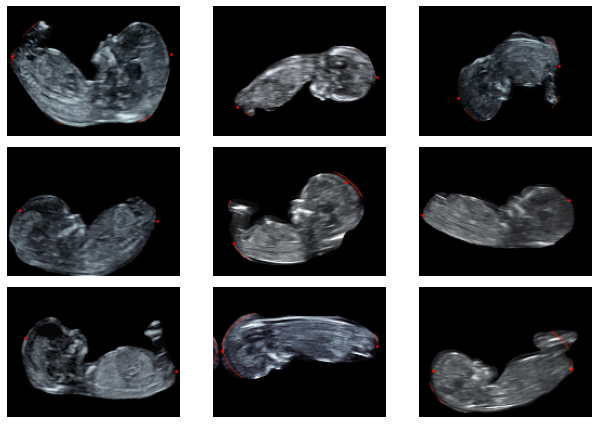

In [5]:
data2.show_batch(3, figsize=(9,6))

In [6]:
learn2 = cnn_learner(data2, models.resnet34, metrics=[accuracy])

In [7]:
learn2.fit_one_cycle(50)
learn2.show_results()
learn2.export('model4.pkl')

epoch,train_loss,valid_loss,time


RuntimeError: DataLoader worker (pid(s) 12160, 4852, 15580) exited unexpectedly

In [ ]:
learn3 = cnn_learner(data2, models.resnet34, metrics=[accuracy])
#fine_tune(number of epochs) -> Hypertuning model built into fast.ai
learn3.fine_tune(50)
learn3.show_results()
learn3.export('model4_hyper.pkl')